In [1]:
from pathlib import Path
import os
import pandas as pd

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score,v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt


from nanoHUB.rfm.functions import CacheDirs, elbow_curve, display_cluster_info

nanoHUB - Serving Students, Researchers & Instructors


In [2]:
cached_dirs = CacheDirs()
data_dir = Path(cached_dirs.cache_dir, 'rfm/by_toolevents/iteration5')

In [3]:
df = pd.read_csv(
    Path(data_dir, 'unclassified_user_data.csv'),
    index_col=False
)

In [4]:
users = pd.DataFrame(df['user'].unique())
users.columns = ['user']

In [5]:
frequency_df = df[['user', 'job_event_days', 'toolevents__lifetime']].copy()
frequency_df['Frequency'] = frequency_df['job_event_days']/frequency_df['toolevents__lifetime']

users = pd.merge(users, frequency_df, on='user')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


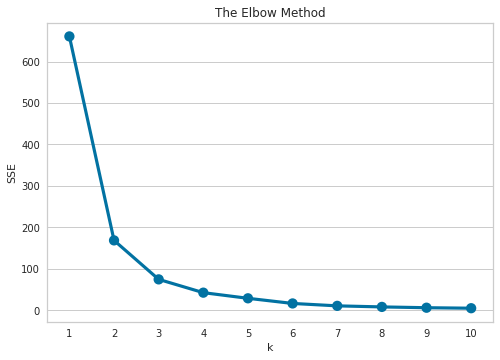

In [6]:
elbow_curve(users[['Frequency']])

In [7]:


kmeans = KMeans(n_clusters=4)
kmeans.fit(users[['Frequency']])
users['FrequencyCluster'] = kmeans.predict(users[['Frequency']])

In [8]:
display(users.groupby('FrequencyCluster')['Frequency'].describe())

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,518.0,1.058696,0.167938,0.833333,1.000000,1.000000,1.000000,2.000000
1,4879.0,0.043729,0.044648,0.000357,0.007194,0.024079,0.071429,0.158416
2,1673.0,0.272823,0.080641,0.158730,0.200000,0.255814,0.333333,0.437500
3,674.0,0.602295,0.102567,0.440476,0.500000,0.600000,0.666667,0.818182


In [9]:
users.to_csv(
    Path(data_dir, "frequency.csv"),
    index=False,
    index_label=False
)

In [10]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(users[['Frequency']])

Score for number of cluster(s) 2: -42.11514922529369
Silhouette score for number of cluster(s) 2: 0.7662913903827867
Davies Bouldin score for number of cluster(s) 2: 0.4494073671067162


'Centroids - '

[[0.40415426]
 [0.05162491]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -18.67312635360019
Silhouette score for number of cluster(s) 3: 0.7105519926697982
Davies Bouldin score for number of cluster(s) 3: 0.43485838899802215


'Centroids - '

[[0.03333619]
 [0.21672768]
 [0.50481018]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -10.567941149366678
Silhouette score for number of cluster(s) 4: 0.6848104428687758
Davies Bouldin score for number of cluster(s) 4: 0.4687239174508273


'Centroids - '

[[0.02125631]
 [0.52926418]
 [0.13481132]
 [0.30053473]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -7.22947409153932
Silhouette score for number of cluster(s) 5: 0.6752330577124216
Davies Bouldin score for number of cluster(s) 5: 0.46200438507203484


'Centroids - '

[[0.20532099]
 [0.01566658]
 [0.53320237]
 [0.09660717]
 [0.34030022]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -4.064235873595972
Silhouette score for number of cluster(s) 6: 0.6865981463106485
Davies Bouldin score for number of cluster(s) 6: 0.3765290966167123


'Centroids - '

[[0.33924304]
 [0.01579017]
 [0.49902461]
 [0.20532099]
 [0.72217267]
 [0.09691859]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 7: -2.601871371831096
Silhouette score for number of cluster(s) 7: 0.6680971485571193
Davies Bouldin score for number of cluster(s) 7: 0.4020416042131313


'Centroids - '

[[0.22025363]
 [0.01076115]
 [0.49902461]
 [0.06401839]
 [0.72217267]
 [0.34091184]
 [0.13141205]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 8: -1.9704335814461702
Silhouette score for number of cluster(s) 8: 0.6506370833713795
Davies Bouldin score for number of cluster(s) 8: 0.4214330616002747


'Centroids - '

[[0.49902461]
 [0.04641306]
 [0.23023412]
 [0.15172389]
 [0.00810221]
 [0.72217267]
 [0.34333966]
 [0.09269583]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 9: -1.4771437197095958
Silhouette score for number of cluster(s) 9: 0.654137038999597
Davies Bouldin score for number of cluster(s) 9: 0.4233145789509927


'Centroids - '

[[0.00686151]
 [0.35317142]
 [0.12839814]
 [0.49902461]
 [0.26253531]
 [0.72217267]
 [0.07890738]
 [0.18963726]
 [0.03820611]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 10: -1.1641666451882833
Silhouette score for number of cluster(s) 10: 0.6609761485271894
Davies Bouldin score for number of cluster(s) 10: 0.4123531292754161


'Centroids - '

[[0.00698882]
 [0.25050325]
 [0.50014996]
 [0.12759279]
 [0.72217267]
 [0.38816982]
 [0.07928288]
 [0.18727805]
 [0.32300262]
 [0.03892661]]
----------------------------------------------------------------------------------------------------


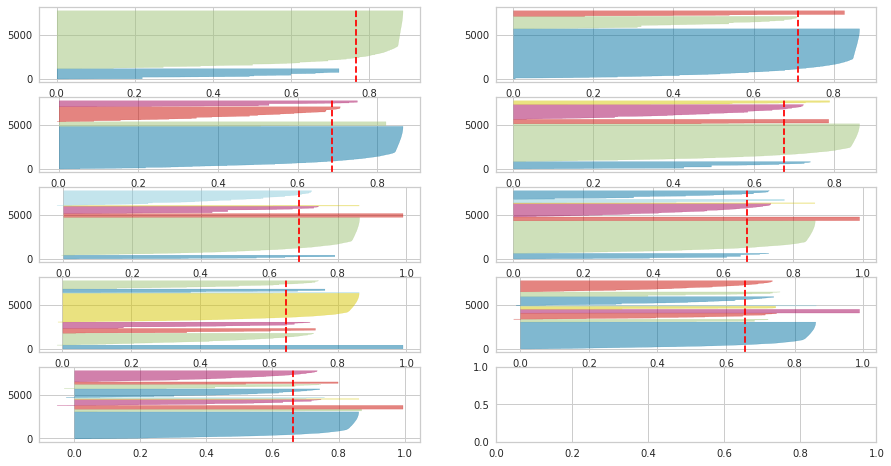

In [11]:
 display_cluster_info(X_scaled)